#**READ ME BEFORE RUNNING!!**

This script is designed to go through the class google drive folder and retrive the HOBO data. You have the option to download the results to your personal drive or not. In order for this script to work, you MUST do two things:

1. You must have the LITESC class folder in your drive. The easiest way to do this is by making a shortcut to it in your main drive.

2. You must run this code in google drive; in particular, on the account which you have the LITESC folder saved. If you run the script off of Google drive, it will do nothing and you will get errors.

In addition, you must retrive the Google Drive file path where the LITESC folder is located. You can easily access that by clicking on the folder icon to the very left of this screen AFTER you've mounted your drive (after you've run the import modules cell)

IMPORTANT: You must link to the "Photos and Data" directory within the LITESC folder or you will get an error!!




In [88]:
# Importing necessary modules

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# User needs to input the directory leading to the "Photos and Data" folder in their drive

directory = input('Please input the file path leading to the photos and data folder in your drive')

## This is just for me down here, just for my purposes

#directory = '/content/drive/MyDrive/2024 LITESC Project Experimental Plan/Photos and Data'

# Error statement to check whether the user directory is correct or not
try:
  folder_list = os.listdir(directory)
except:
  print('That directory does not work. Please check the directory and run the code again')

In [91]:
# Loops to read in the data. Will be divided into two parts

big_data_dict = {}

for day in range(12, 16): # looping through all days of data
  indiv_day_dir = directory + '/' + f"10 {day} 2024"
  day_site_list = os.listdir(indiv_day_dir)

  for site in day_site_list:
    site_path = indiv_day_dir + '/' + f"{site}"

    if os.path.isdir(site_path) == True: # check to see if the path belongs to a directory
      if 'Data' in os.listdir(site_path): # check to see if there is a data folder within the directory
             data_dir = site_path + '/' + 'Data'

             hobo_data_dir = data_dir + '/' + 'HOBO'

             if not os.listdir(hobo_data_dir): # check to see if there is a hobo file
              print(f"There is no HOBO data for {site} on 10/{day}/24")
             else:
              try:
                hobo_folder_files = os.listdir(hobo_data_dir)
                csv_files = list(filter(lambda f: f.endswith('.csv'), hobo_folder_files)) # check to find all the CSV files within the folder

                data_read = pd.read_csv(hobo_data_dir + '/' + f"{csv_files[0]}", header = 1, on_bad_lines='skip')
                big_data_dict[f"10_{day}_24:{site}"] = data_read
              except:
                print(f"There is a corruption error with {site} on 10/{day}/24")
                print(f"{os.listdir(hobo_data_dir)[0]}")

There is no HOBO data for Site 1 - McLain on 10/13/24
There is no HOBO data for Site 2 - Lily Pond on 10/13/24


In [98]:
# Code block to clean up the data

for key in big_data_dict.keys():
  big_data_dict[key][big_data_dict[key].columns[1]] = pd.to_datetime(big_data_dict[key][big_data_dict[key].columns[1]]) # converting to datetime
  big_data_dict[key][big_data_dict[key].columns[1]] = big_data_dict[key][big_data_dict[key].columns[1]] + timedelta(hours=4) # conversion from EDT to UTC

  data_only = big_data_dict[key][big_data_dict[key].columns[2:]]
  data_only[data_only < -800] = np.NaN
  big_data_dict[key][big_data_dict[key].columns[2:]] = data_only # converting all -800 values to nans

<ipython-input-98-367e6c924413>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_only[data_only < -800] = np.NaN
<ipython-input-98-367e6c924413>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_only[data_only < -800] = np.NaN
<ipython-input-98-367e6c924413>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_onl

# This section is under construction

In [100]:
big_data_dict['10_12_24:Site 1 - McLain']

,#,"Date Time, GMT-06:00","Solar Radiation, W/m² (LGR S/N: 10634520, SEN S/N: 10606975)","Temp, °C (LGR S/N: 10634520, SEN S/N: 10607184)","RH, % (LGR S/N: 10634520, SEN S/N: 10607184)","Wind Direction, ø (LGR S/N: 10634520, SEN S/N: 10615072)","Wind Speed, m/s (LGR S/N: 10634520, SEN S/N: 10617574)","Gust Speed, m/s (LGR S/N: 10634520, SEN S/N: 10617574)","Pressure, mbar (LGR S/N: 10634520, SEN S/N: 10621217)","DewPt, °C (LGR S/N: 10634520, SEN S/N: 10607184)"
0,1,2024-10-12 23:31:00,201.9,11.904,55.5,183.9,0.00,1.51,999.55,3.290
1,2,2024-10-12 23:32:00,198.1,11.953,55.7,174.1,0.00,0.76,999.55,3.387
2,3,2024-10-12 23:33:00,194.4,11.929,55.4,182.5,0.76,1.51,999.45,3.288
3,4,2024-10-12 23:34:00,191.9,11.929,55.7,182.5,0.25,0.76,999.45,3.364
4,5,2024-10-12 23:35:00,190.6,11.977,55.9,169.9,0.00,0.00,999.45,3.460
...,...,...,...,...,...,...,...,...,...,...
1891,1892,2024-10-14 07:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,1893,2024-10-14 07:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893,1894,2024-10-14 07:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1894,1895,2024-10-14 07:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2024 LITESC Project Experimental Plan/Photos and Data/10 12 2024/Site 1 - McLain/Site_1_10122024_HOBO_FINAL.csv', header=1)

In [ ]:
data[data < -800] = np.NaN

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
data2 = data[data.columns[2:]]

In [ ]:
data2[data2 < -800] = np.NaN

<ipython-input-19-458763e566aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[data2 < -800] = np.NaN
<ipython-input-19-458763e566aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[data2 < -800] = np.NaN


In [ ]:
data2

,"Solar Radiation, W/m² (LGR S/N: 10634520, SEN S/N: 10606975)","Temp, °C (LGR S/N: 10634520, SEN S/N: 10607184)","RH, % (LGR S/N: 10634520, SEN S/N: 10607184)","Wind Direction, ø (LGR S/N: 10634520, SEN S/N: 10615072)","Wind Speed, m/s (LGR S/N: 10634520, SEN S/N: 10617574)","Gust Speed, m/s (LGR S/N: 10634520, SEN S/N: 10617574)","Pressure, mbar (LGR S/N: 10634520, SEN S/N: 10621217)","DewPt, °C (LGR S/N: 10634520, SEN S/N: 10607184)"
0,201.9,11.904,55.5,183.9,0.00,1.51,999.55,3.290
1,198.1,11.953,55.7,174.1,0.00,0.76,999.55,3.387
2,194.4,11.929,55.4,182.5,0.76,1.51,999.45,3.288
3,191.9,11.929,55.7,182.5,0.25,0.76,999.45,3.364
4,190.6,11.977,55.9,169.9,0.00,0.00,999.45,3.460
...,...,...,...,...,...,...,...,...
1891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


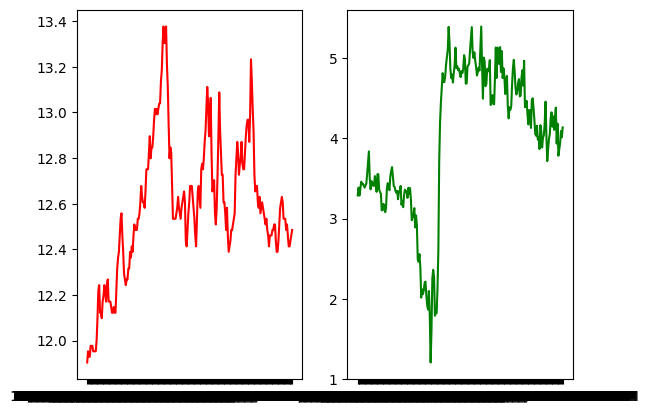

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)

ax.plot(data[data.columns[1]][0:240], data2[data2.columns[1]][0:240], color='red')

ax2 = fig.add_subplot(1, 2, 2)

ax2.plot(data[data.columns[1]][0:240], data2[data2.columns[7]][0:240], color='green')